$$\huge \text{ Module 7 Decision Trees and Ensemble Methods}$$

<font size=5 color =red> __Warning: Decision Trees are Notorious over-fitters__  


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# First Decision tree Classifier  ( Try with more features and more depth)

<font size=4> https://scikit-learn.org/stable/modules/tree.html

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
#X = iris.data # Add Features must also change below for tree 
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2
                                , random_state=42)
tree_clf.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
#!pip install graphviz


In [3]:
import numpy as np
import os


from graphviz import Source
from sklearn.tree import export_graphviz

In [22]:
export_graphviz(
        tree_clf,
        out_file=os.path.join("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        #feature_names=iris.feature_names,
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join("iris_tree.dot"))

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

<font size=4> 
    
Assume the classification has $n$ classes

$$p_{i,k}=\text{ratio of  the $k^{th}$ class is in the $i^{th}$ node}$$
    
$$G_i = 1 − \sum _{k = 1}^n  p_{i, k}^2$$
    
So the depth 2 left node has $G_i=1-(0/54)^2-(49/54)^2-(5/54)^2=.168$ 
    
    
Cart Cost funtion for classification 
    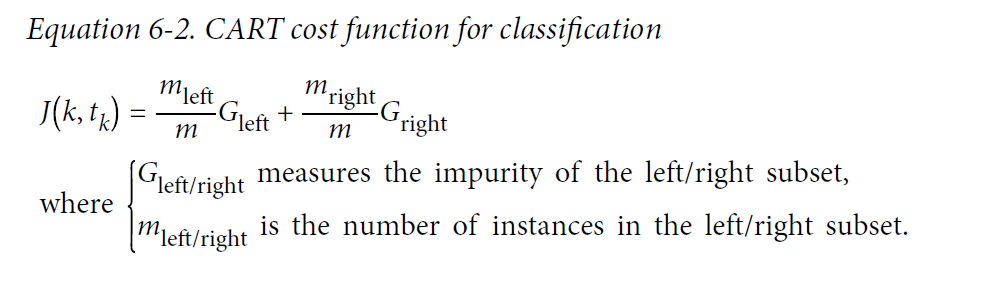

## This plotter only works fo 2-features depth 2

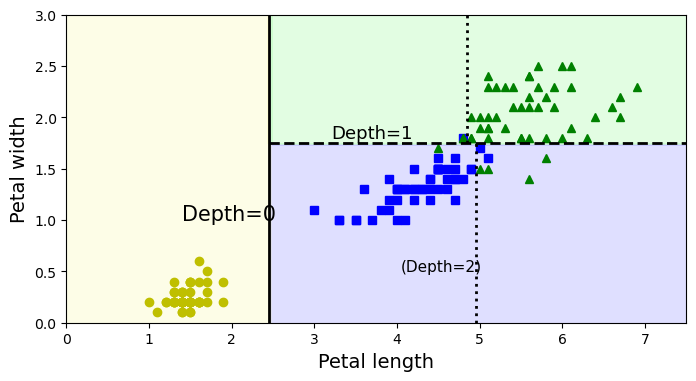

In [8]:
#
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

# Estimating Class Probabilities

In [137]:
tree_clf.predict_proba([[5, 1.7]])

array([[0., 1., 0.]])

In [138]:
tree_clf.predict([[5, 1.7]])

array([1])

<font size=4> [The importance](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [139]:
tree_clf.feature_importances_

array([0.57167834, 0.42832166])

# Parameters of Tree for classification

<font size =4>https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# First Decision tree Regressor

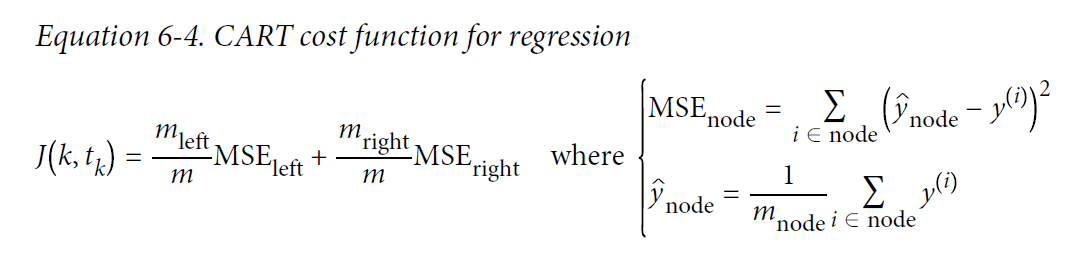

In [15]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

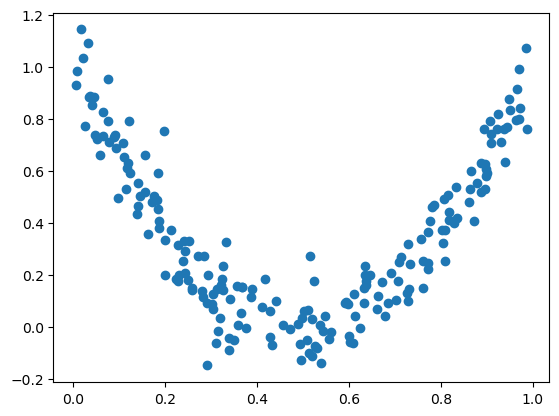

In [16]:

plt.scatter(X,y)

In [144]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

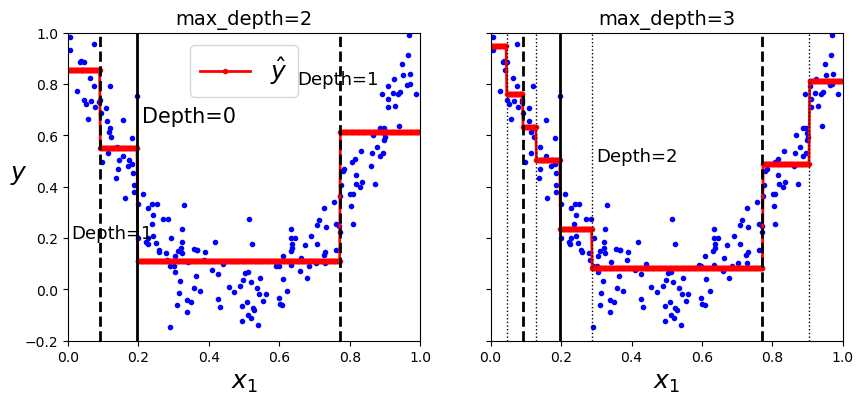

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3) #Change Depth to 10 what do you see?
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)


plt.show()

In [ ]:
export_graphviz(
        tree_reg1,
        out_file=("regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
)
Source.from_file( "regression_tree.dot")

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

<font size=4> https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

    
__min_samples_splitint or float, default=2__
    
    The minimum number of samples required to split an internal node:

    If int, then consider min_samples_split as the minimum number.

    If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

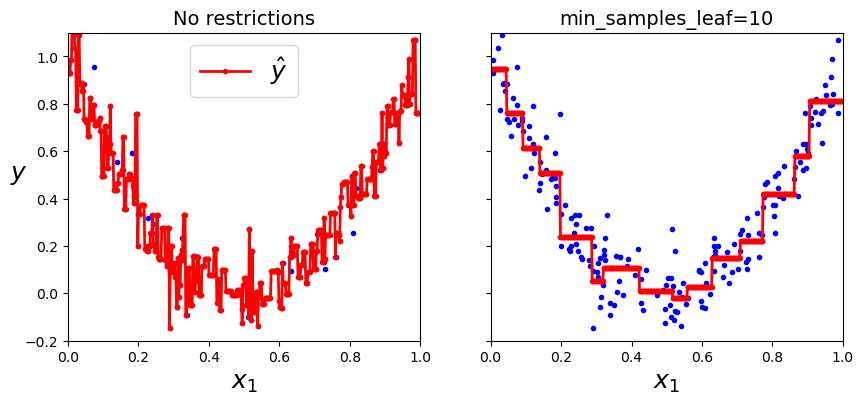

In [26]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)

plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

## [Multi Output Regressor](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression_multioutput.html#sphx-glr-auto-examples-tree-plot-tree-regression-multioutput-py)

<font size=4>  In this example we want to give the Regressor one input and we want to predict several things multiple things at the same time.  For example if we are given the weight of a car can we construc a model that predicts the engine size and the mpg at the same time.

<Figure size 640x480 with 0 Axes>

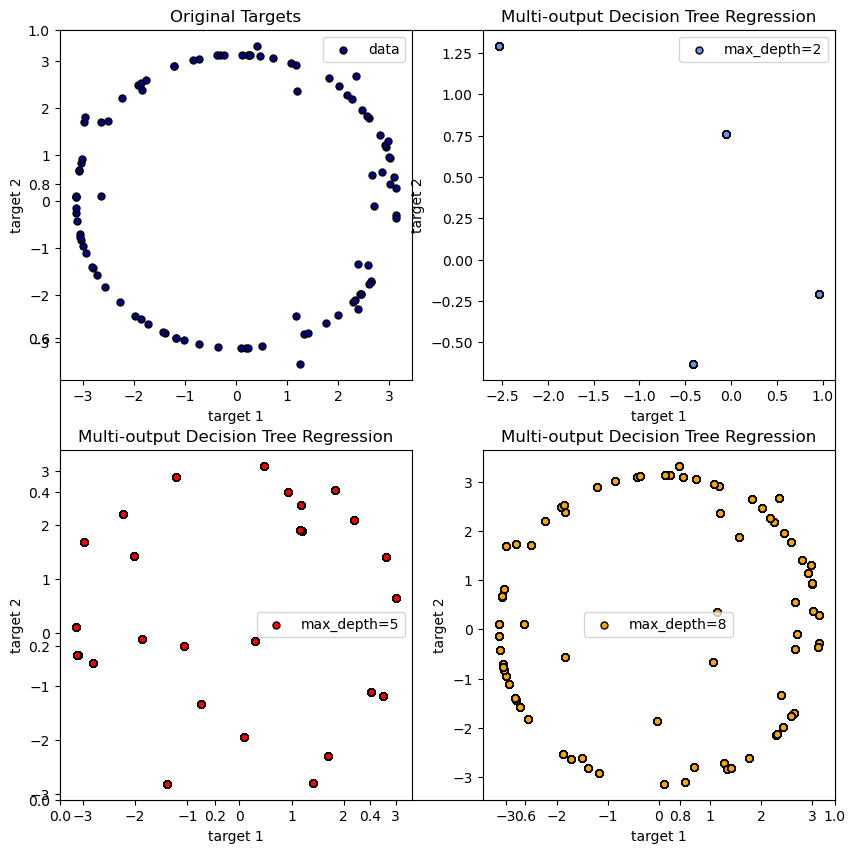

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset 1 input with two outputs 
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += 0.5 - rng.rand(20, 2)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
s = 25
plt.figure(1)

plt.subplots(figsize=(10, 10))
plt.subplot(221)
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s, edgecolor="black", label="data")
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Original Targets")
plt.legend()

plt.subplot(222)

plt.scatter(
    y_1[:, 0],
    y_1[:, 1],
    c="cornflowerblue",
    s=s,
    edgecolor="black",
    label="max_depth=2",
)
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend()


plt.subplot(223)
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s, edgecolor="black", label="max_depth=5") 
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend()

plt.subplot(224)
plt.scatter(
    y_3[:, 0], y_3[:, 1], c="orange", s=s, edgecolor="black", label="max_depth=8"
)
# plt.xlim([-.6, .8])
# plt.ylim([-.6, .8])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend()
plt.show()

<font size=4 color=blue> Why are so few points showing up for max depth 2?

In [116]:
y_1

array([[-0.41615261, -0.63102187],
       [-0.41615261, -0.63102187],
       [-0.41615261, -0.63102187],
       ...,
       [-0.05207683,  0.7579407 ],
       [-0.05207683,  0.7579407 ],
       [-0.05207683,  0.7579407 ]])

## Ensemble Methods
<br>
<font size=4> 
    
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html
    
     voting{‘hard’, ‘soft’}, default=’hard’
    If ‘hard’, uses predicted class labels for majority rule voting. Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.
    
To use soft voting the classifier must produce probabilities.  For example SGD Classifer does not produce Probabilities.    


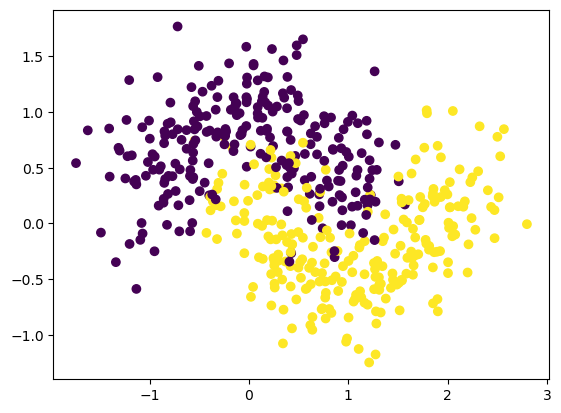

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.3
                  , random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
plt.scatter(X[:,0],X[:,1],c=y)

## Hard Voting 

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [158]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [159]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


##  Soft Voting: Notice we needed  probability=True in the SVC Classifier. To use this it must have a probablity.

In [160]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [161]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


# Sometimes it doesn't improve

In [162]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

log_clf = LogisticRegression(solver="lbfgs", random_state=42,max_iter=1000)
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
sgd_clf =  SGDClassifier()
mlp_clf =  MLPClassifier(hidden_layer_sizes=(8),random_state=42,max_iter=5000)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('tc', tree_clf), ('mlp', mlp_clf)],
    voting='soft') # change voting to soft

In [163]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('tc',
                              DecisionTreeClassifier(max_depth=1,
                                                     random_state=42)),
                             ('mlp',
                              MLPClassifier(hidden_layer_sizes=8, max_iter=5000,
                                            random_state=42))],
                 voting='soft')

In [164]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, tree_clf, mlp_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
DecisionTreeClassifier 0.824
MLPClassifier 0.856
VotingClassifier 0.84
